In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import pandas_datareader.data as pdr
yf.pdr_override()

In [18]:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()
for x in assets :
  pf_data[x] = pdr.get_data_yahoo(x, start=dt.datetime(2010, 1, 1))['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


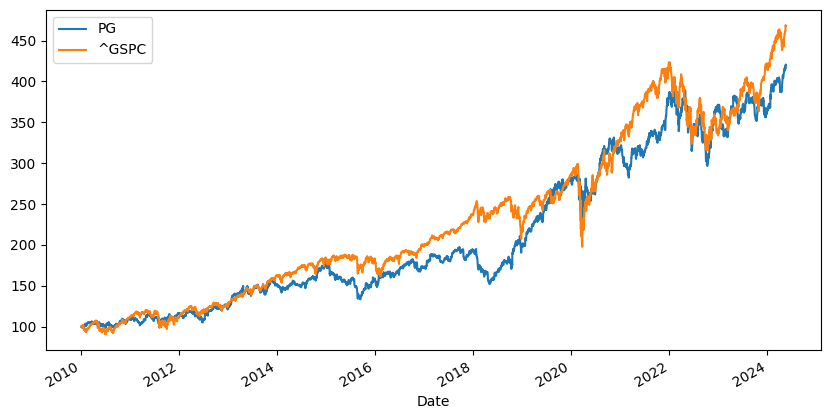

In [19]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))
plt.show()

In [20]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [21]:
log_returns.cov()*250

,PG,^GSPC
PG,0.029054,0.016477
^GSPC,0.016477,0.030160


In [22]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.556615
^GSPC,0.556615,1.000000


In [23]:
log_returns.mean()*250

PG       0.099211
^GSPC    0.106681
dtype: float64

In [24]:
num_assets = len(assets)

In [25]:
arr = np.random.random(2)

In [26]:
arr[0]+arr[1]

0.848711234689299

In [28]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.53127218, 0.46872782])

In [29]:
weights[0]+weights[1]

1.0

In [30]:
np.sum(weights * log_returns.mean())* 250

0.10271238664429877

Portfolio Variance

In [31]:
np.dot(weights.T,np.dot(log_returns.cov()* 250,weights))

0.023032925434320152

Portfolio Volatility

In [32]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()* 250,weights)))

0.15176602200202835

In [33]:
portfolio_returns=[]
portfolio_volatilities=[]
for x in range(1000):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    portfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov(),weights))))

portfolio_returns,portfolio_volatilities

([0.10338196690194869,
  0.10579276959582792,
  0.10579585518593738,
  0.1022616667334084,
  0.10091534057680068,
  0.10333974856930131,
  0.10469602324828695,
  0.10297632856606181,
  0.10307224663814968,
  0.10586643675319558,
  0.10182820218867526,
  0.10290465455058671,
  0.10506597539679044,
  0.10222984942388547,
  0.10482120892568418,
  0.10653684010528557,
  0.10002577928034817,
  0.1035420579686101,
  0.09939075114567698,
  0.10271155814002467,
  0.10216548989744274,
  0.10577481830790471,
  0.10282661633873534,
  0.10528238311420654,
  0.1032178173147575,
  0.1056803608821546,
  0.1029414997658717,
  0.09922202292292757,
  0.10582848521600159,
  0.10329727795772671,
  0.10262353927112655,
  0.10641014155671541,
  0.10263175295688073,
  0.10259696492357254,
  0.103783689230664,
  0.10219151314906663,
  0.1065248710355243,
  0.10634574716000861,
  0.10286131789018593,
  0.10066980350139403,
  0.1031736504487053,
  0.10320698617764465,
  0.10354661228662283,
  0.1001722927276814

In [34]:
portfolio_returns=np.array(portfolio_returns)
portfolio_volatilities=np.array(portfolio_volatilities)
portfolio_returns,portfolio_volatilities

(array([0.10338197, 0.10579277, 0.10579586, 0.10226167, 0.10091534,
        0.10333975, 0.10469602, 0.10297633, 0.10307225, 0.10586644,
        0.1018282 , 0.10290465, 0.10506598, 0.10222985, 0.10482121,
        0.10653684, 0.10002578, 0.10354206, 0.09939075, 0.10271156,
        0.10216549, 0.10577482, 0.10282662, 0.10528238, 0.10321782,
        0.10568036, 0.1029415 , 0.09922202, 0.10582849, 0.10329728,
        0.10262354, 0.10641014, 0.10263175, 0.10259696, 0.10378369,
        0.10219151, 0.10652487, 0.10634575, 0.10286132, 0.1006698 ,
        0.10317365, 0.10320699, 0.10354661, 0.10017229, 0.10039578,
        0.10395509, 0.10488615, 0.10360386, 0.10204087, 0.09960672,
        0.10136691, 0.10222038, 0.10094575, 0.10489765, 0.10284406,
        0.10287189, 0.10385182, 0.10178113, 0.10232513, 0.10604173,
        0.10320139, 0.10556566, 0.10286147, 0.10481958, 0.10377697,
        0.10638061, 0.10241215, 0.10615182, 0.10370863, 0.10451943,
        0.10296944, 0.10560424, 0.1025431 , 0.10

In [35]:
portfolios=pd.DataFrame({'Return': portfolio_returns,'Volatility':portfolio_volatilities})

In [36]:
portfolios.head()

,Return,Volatility
0,0.103382,0.009632
1,0.105793,0.010445
2,0.105796,0.010447
3,0.102262,0.009625
4,0.100915,0.009936


Text(0, 0.5, 'Expected Return')

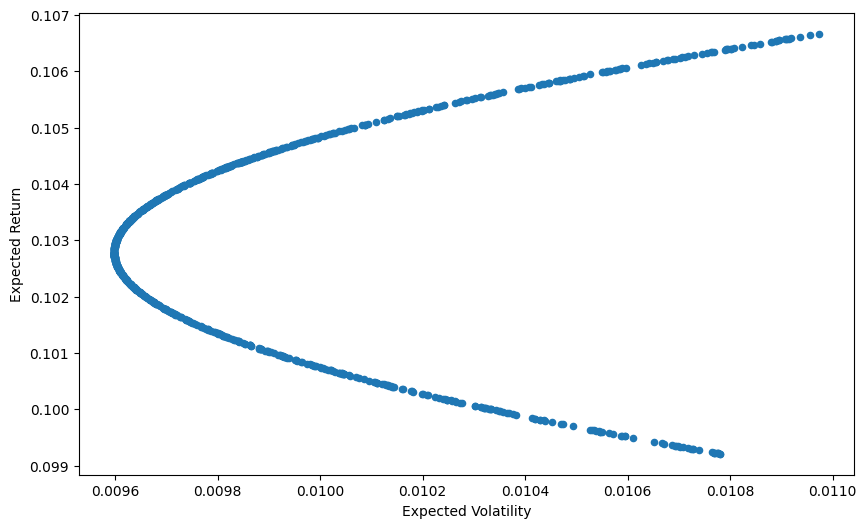

In [37]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')